In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import pickle

### Show the models trained on different distances

In [2]:
model = 'BRF' # choose "BRF" for Balanced Random Forest or "SVC" for Support Vector Classifier
path2dicts = glob(f'../data/svc/distance_cases/*/cm_{model}_*m.pkl')
path2dicts.sort()

Text(0, 0.5, 'True')

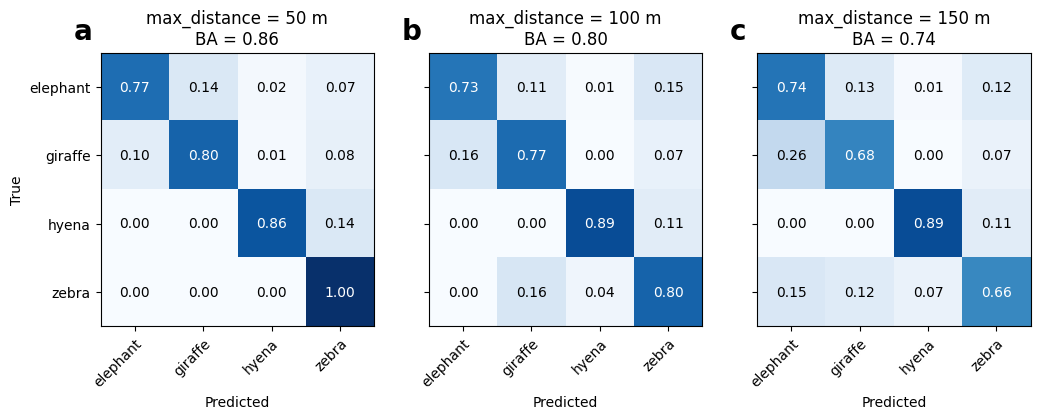

In [3]:
# plot the confusion matrix

fig, ax = plt.subplots(1, len(path2dicts), figsize=(12, 6), sharey=True, sharex=True)

for i, path2dict in enumerate(path2dicts):

    with open(path2dict, 'rb') as f:
        data_dict = pickle.load(f)

    cm = data_dict['confusion_matrix']
    species_labels = data_dict['species']
    max_distance = data_dict['distance']
    balanced_accuracy = data_dict['balanced_accuracy']

    cax = ax[i].matshow(cm, cmap='Blues', vmin=0, vmax=1)

    # Annotate the confusion matrix
    for (j, k), val in np.ndenumerate(cm):
        ax[i].text(k, j, f'{val:.2f}', ha='center', va='center', color='white' if val > 0.5 else 'black')

    # Set labels
    ax[i].set_xticks(np.arange(len(species_labels)))
    ax[i].set_yticks(np.arange(len(species_labels)))
    ax[i].xaxis.set_ticks_position('bottom')  # Move x-axis ticks to the bottom
    ax[i].xaxis.set_label_position('bottom')  # Move x-axis label to the bottom
    ax[i].set_xticklabels(species_labels)
    ax[i].set_yticklabels(species_labels)
    ax[i].set_title('max_distance = %s m\nBA = %.2f' % (max_distance, balanced_accuracy))
    ax[i].set_xlabel('Predicted')

    # add bold minuscule alphabet letters to the axes
    ax[i].text(-0.1, 1.05, chr(97 + i), transform=ax[i].transAxes, size=20, weight='bold')

    # Rotate the tick labels and set alignment
    plt.setp(ax[i].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

ax[0].set_ylabel('True')

# add vertical colorbar to the right, aligned with the confusion matrix
#fig.colorbar(cax, ax=ax, shrink=0.48)

### Show the transfer models

In [4]:
station2load = ['ETA00', 'STA02', 'NWP05']

In [5]:
path2transfers = []
path2normals = []
for station in station2load:
    path2transfers += glob(f'../data/svc/transfer_cases/{station}_50m/cm_transfer.pkl')
    path2normals += glob(f'../data/svc/transfer_cases/{station}_50m/cm_normal.pkl')

Text(0.125, 0.95, 'Transfer Cases')

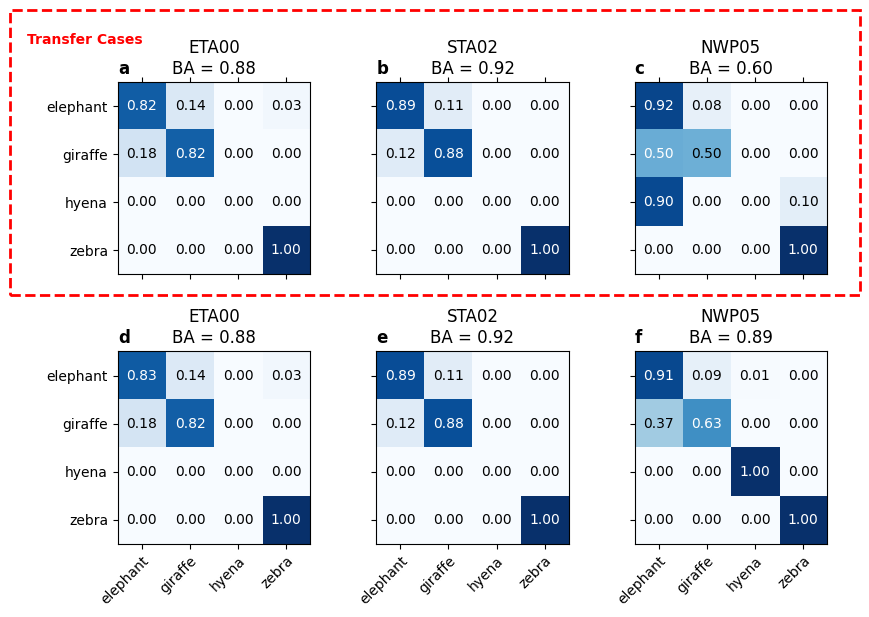

In [ ]:
# plot the confusion matrix

fig, ax = plt.subplots(2, len(path2transfers), figsize=(10, 6), sharex=True, sharey=True)

for i, path2transfer, path2normal in zip(range(len(path2transfers)), path2transfers, path2normals):

    ##################
    # Transfer model #
    ##################

    with open(path2transfer, 'rb') as f:
        transfer_dict = pickle.load(f)

    cm = transfer_dict['confusion_matrix']
    species_labels = transfer_dict['species']
    balanced_accuracy = transfer_dict['balanced_accuracy']
    station = transfer_dict['station']

    cax = ax[0][i].matshow(cm, cmap='Blues', vmin=0, vmax=1)

    # Annotate the confusion matrix
    for (j, k), val in np.ndenumerate(cm):
        ax[0][i].text(k, j, f'{val:.2f}', ha='center', va='center', color='white' if val > 0.5 else 'black')

    ax[0][i].set_title('%s\nBA = %.2f' % (station, balanced_accuracy))
    ax[0][i].set_title(chr(97 + i), loc='left', weight='bold')

    ################
    # Normal model #
    ################

    with open(path2normal, 'rb') as f:
        normal_dict = pickle.load(f)

    cm = normal_dict['confusion_matrix']
    species_labels = normal_dict['species']
    balanced_accuracy = normal_dict['balanced_accuracy']
    station = normal_dict['station']

    cax = ax[1][i].matshow(cm, cmap='Blues', vmin=0, vmax=1)

    # Annotate the confusion matrix
    for (j, k), val in np.ndenumerate(cm):
        ax[1][i].text(k, j, f'{val:.2f}', ha='center', va='center', color='white' if val > 0.5 else 'black')

    ax[1][i].set_title('%s\nBA = %.2f' % (station, balanced_accuracy))
    ax[1][i].set_title(chr(97+3 + i), loc='left', weight='bold')
    ax[1][i].set_xticks(np.arange(len(species_labels)))
    ax[1][i].set_yticks(np.arange(len(species_labels)))
    ax[1][i].xaxis.set_ticks_position('bottom')  # Move x-axis ticks to the bottom
    ax[1][i].xaxis.set_label_position('bottom')  # Move x-axis label to the bottom
    ax[1][i].set_xticklabels(species_labels)
    ax[1][i].set_yticklabels(species_labels)
    plt.setp(ax[1][i].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

fig.subplots_adjust(wspace=0.001, hspace=0.4)

# add a rectangle around the transfer models
rect = plt.Rectangle((0.05, .525), .85, .475, fill=False, edgecolor='red', lw=2,ls='--')
fig.add_artist(rect)
rect.set_clip_on(False)

# add a text to the rectangle
fig.text(0.125, .95, 'Transfer Cases', ha='center', va='center', color='red', weight='bold')